In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading data into Python environment
df=pd.read_csv('Weather_Data.csv')
df

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


<AxesSubplot:>

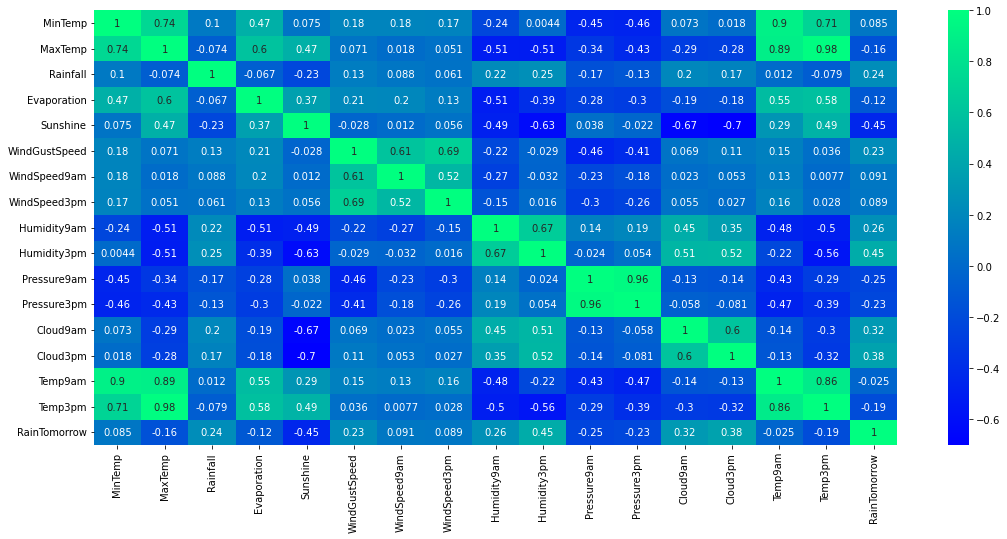

In [4]:
# Correlation Matrix
corr_matrix=df.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

Highly positive correlated : MinTemp and MaxTemp , MinTemp and Temp9am , MinTemp and Temp3pm MaxTemp and Temp9am , MaxTemp and Temp3pm , Pressure9am and Pressure 3pm, Temp9am and Temp 3pm

Negatively correlated : Sunshine and Cloud9am , Sunshine and Cloud3pm

The columns MaxTemp,Evaporation,Sunshine,Pressure9am,Pressure3pm,Temp9am and Temp3pm have less negative correlation with the Target variable,'RainTomorrow'.

1


In [5]:
# Dropping the unnecessary features
df1=df.drop(['row ID','Rainfall','Evaporation','Sunshine','WindDir9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Cloud9am','Temp9am'],axis=1)

In [6]:
# Checking Missing values in the data
df1.isna().sum()

Location             0
MinTemp            443
MaxTemp            230
WindGustDir       6521
WindGustSpeed     6480
WindDir3pm        2648
Humidity3pm       2506
Pressure3pm       9736
Cloud3pm         40002
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [7]:
# Filling the missing values with median
df1['MinTemp']=df1['MinTemp'].fillna(df1['MinTemp'].median())
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].median())
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].median())
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].median())
df1['Temp3pm']=df1['Temp3pm'].fillna(df1['Temp3pm'].median())

In [8]:
# Filling missing values in  with Cloud3pm' and 'Humidity3pm' with mean
df1['Cloud3pm']=df1['Cloud3pm'].fillna(df1['Cloud3pm'].mean())
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())

In [9]:
df1.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
WindGustDir      6521
WindGustSpeed       0
WindDir3pm       2648
Humidity3pm         0
Pressure3pm         0
Cloud3pm            0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64

In [10]:
df1['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [11]:
df1['WindDir3pm'].mode()

0    SE
Name: WindDir3pm, dtype: object

In [12]:
# Filling missing values with mode
df1['WindGustDir']=df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0])
df1['WindDir3pm']=df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0])

In [13]:
# When we fill the missing values in RainToday with mode, this might mislead our model.Hence
# dropping these rows
df1=df1.dropna(subset=['RainToday'])

In [14]:
df1=df1.reset_index(drop=True)

In [15]:
df1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
Cloud3pm         0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
# In the column Humidity3pm, there is 0% Humidity. That is impossible
df1[df1['Humidity3pm']==0]

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
72569,Woomera,19.4,40.0,NNW,61.0,N,0.0,1007.6,1.0,38.9,No,0
72843,Woomera,23.4,41.6,SSW,69.0,NNW,0.0,1006.5,0.0,40.5,No,0
73060,Woomera,17.3,37.1,NNW,70.0,NNW,0.0,1016.6,0.0,36.6,No,0
73068,Woomera,17.7,38.1,N,50.0,NNW,0.0,1013.5,5.0,37.4,No,0


In [17]:
# Replacing 0% Humidity with 1%
df1['Humidity3pm']=df1['Humidity3pm'].replace(0,1)

In [ ]:
# Handling outliers

In [18]:
# Finding interquartile range and detecting the outliers in MinTemp
Q1=np.percentile(df1['MinTemp'],25)
Q3=np.percentile(df1['MinTemp'],75)

In [19]:
print(Q1)
print(Q3)

7.6
16.8


In [20]:
IQR=Q3-Q1
IQR

9.200000000000001

<AxesSubplot:xlabel='MinTemp'>

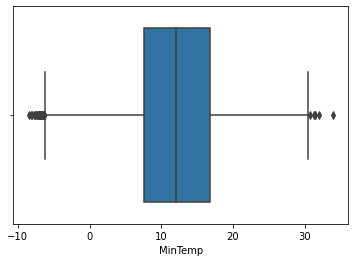

In [21]:
sns.boxplot(df1['MinTemp'])

In [22]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(-6.200000000000001, 30.6)

In [23]:
outliers=[]
for x in df1['MinTemp']:
    if(x<low_lim)or(x>up_lim):
        outliers.append(x)

In [24]:
outliers

[-6.9,
 -6.5,
 -6.3,
 -8.0,
 -6.7,
 -6.6,
 -6.8,
 -7.0,
 -6.9,
 -7.0,
 -6.7,
 -7.0,
 -6.3,
 -6.7,
 -8.5,
 -6.3,
 -7.1,
 -6.4,
 -6.5,
 -6.5,
 -6.6,
 -6.5,
 -6.3,
 -6.7,
 -7.6,
 -6.6,
 -7.5,
 -6.4,
 -6.4,
 -6.7,
 -6.5,
 -8.2,
 -7.2,
 -6.5,
 -7.8,
 -7.0,
 -7.3,
 -7.0,
 31.9,
 33.9,
 30.7,
 31.4,
 31.4,
 31.2]

In [25]:
ind=(df1['MinTemp']<low_lim)|(df1['MinTemp']>up_lim)

In [26]:
df1.loc[ind].index

Int64Index([31546, 31547, 31597, 31598, 31599, 31850, 31875, 32545, 32547,
            32566, 33442, 33687, 34618, 35263, 35264, 35310, 35481, 35624,
            35661, 35664, 35702, 36115, 36134, 36336, 36352, 36353, 36357,
            36563, 36577, 36587, 36602, 36609, 36610, 36620, 36839, 36840,
            36848, 36855, 48901, 65185, 66788, 71446, 72653, 78584],
           dtype='int64')

In [27]:
df1['MinTemp']=np.where(df1['MinTemp']<low_lim,low_lim,np.where(df1['MinTemp']>up_lim,up_lim,df1['MinTemp']))

<AxesSubplot:xlabel='MinTemp'>

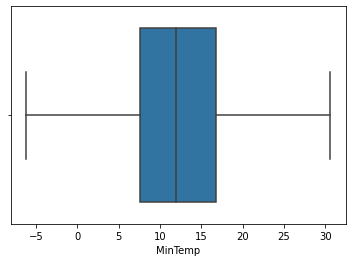

In [28]:
sns.boxplot(df1['MinTemp'])

In [29]:
# Finding interquartile range and detecting the outliers in MaxTemp
Q1=np.percentile(df1['MaxTemp'],25)
Q3=np.percentile(df1['MaxTemp'],75)
Q1,Q3

(17.9, 28.2)

<AxesSubplot:xlabel='MaxTemp'>

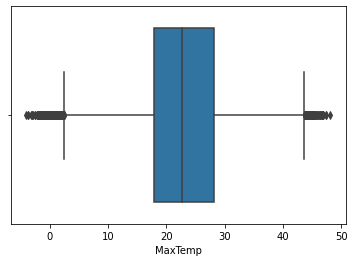

In [30]:
sns.boxplot(df1['MaxTemp'])

In [31]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(2.4499999999999975, 43.65)

In [32]:
outliers=[]
for x in df1['MaxTemp']:
    if(x<low_lim)or(x>up_lim):
        outliers.append(x)

In [33]:
df1['MaxTemp']=np.where(df1['MaxTemp']<low_lim,low_lim,np.where(df1['MaxTemp']>up_lim,up_lim,df1['MaxTemp']))

<AxesSubplot:xlabel='MaxTemp'>

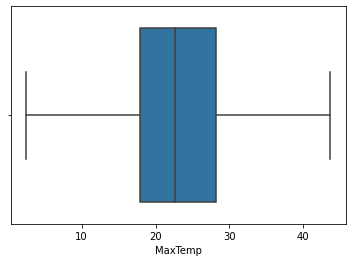

In [34]:
sns.boxplot(df1['MaxTemp'])

In [35]:
# Finding interquartile range and detecting the outliers in WindGustSpeed
Q1=np.percentile(df1['WindGustSpeed'],25)
Q3=np.percentile(df1['WindGustSpeed'],75)
Q1,Q3

(31.0, 46.0)

<AxesSubplot:xlabel='WindGustSpeed'>

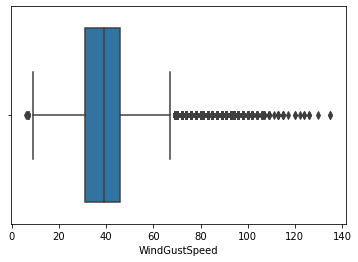

In [36]:
sns.boxplot(df1['WindGustSpeed'])

In [37]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(8.5, 68.5)

In [38]:
outliers=[]
for x in df1['WindGustSpeed']:
    if(x<low_lim)|(x>up_lim):
        outliers.append(x)

In [39]:
df1['WindGustSpeed']=np.where(df1['WindGustSpeed']<low_lim,low_lim,np.where(df1['WindGustSpeed']>up_lim,up_lim,df1['WindGustSpeed']))

<AxesSubplot:xlabel='WindGustSpeed'>

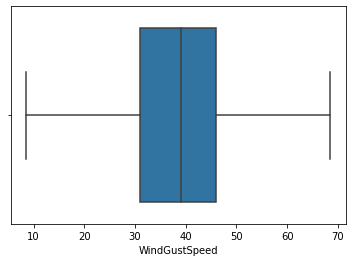

In [40]:
sns.boxplot(df1['WindGustSpeed'])

In [41]:
# Finding interquartile range and detecting the outliers in Pressure3pm
Q1=np.percentile(df1['Pressure3pm'],25)
Q3=np.percentile(df1['Pressure3pm'],75)
Q1,Q3

(1011.0, 1019.5)

<AxesSubplot:xlabel='Pressure3pm'>

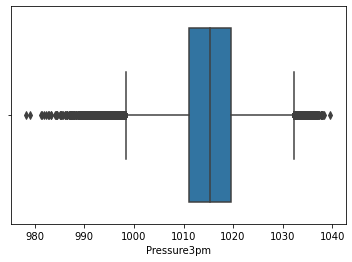

In [42]:
sns.boxplot(df1['Pressure3pm'])

In [43]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(998.25, 1032.25)

In [44]:
outliers=[]
for x in df1['Pressure3pm']:
    if(x<low_lim)|(x>up_lim):
        outliers.append(x)

In [45]:
df1['Pressure3pm']=np.where(df1['Pressure3pm']<low_lim,low_lim,np.where(df1['Pressure3pm']>up_lim,up_lim,df1['Pressure3pm']))

<AxesSubplot:xlabel='Pressure3pm'>

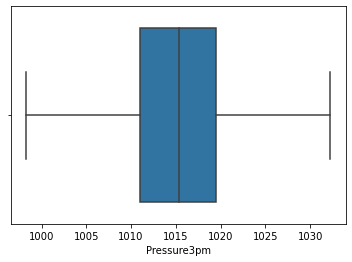

In [46]:
sns.boxplot(df1['Pressure3pm'])

In [47]:
# Finding interquartile range and detecting the outliers in Temp3pm
Q1=np.percentile(df1['Temp3pm'],25)
Q3=np.percentile(df1['Temp3pm'],75)
Q1,Q3

(16.7, 26.3)

In [48]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(2.299999999999997, 40.7)

In [49]:
outliers=[]
for x in df1['Temp3pm']:
    if(x<low_lim)|(x>up_lim):
        outliers.append(x)

In [50]:
df1['Temp3pm']=np.where(df1['Temp3pm']<low_lim,low_lim,np.where(df1['Temp3pm']>up_lim,up_lim,df1['Temp3pm']))

<AxesSubplot:xlabel='Temp3pm'>

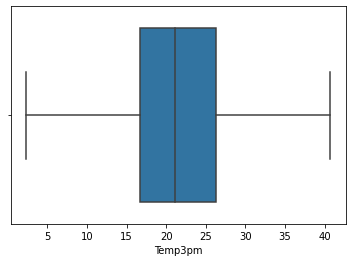

In [51]:
sns.boxplot(df1['Temp3pm'])

In [52]:
# Label Encoding Location,WindDir3pm,WindGustDir and RainToday
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df1['Location']=lab_enc.fit_transform(df1['Location'])
df1['WindDir3pm']=lab_enc.fit_transform(df1['WindDir3pm'])
df1['WindGustDir']=lab_enc.fit_transform(df1['WindGustDir'])
df1['RainToday']=lab_enc.fit_transform(df1['RainToday'])

In [53]:
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,13,44.0,14,22.0,1007.1,4.519122,21.8,0,0
1,2,7.4,25.1,14,44.0,15,25.0,1007.8,4.519122,24.3,0,0
2,2,17.5,32.3,13,41.0,7,33.0,1006.0,8.000000,29.7,0,0
3,2,14.6,29.7,14,56.0,13,23.0,1005.4,4.519122,28.9,0,0
4,2,7.7,26.7,13,35.0,13,19.0,1010.1,4.519122,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98532,41,8.0,20.7,2,41.0,0,32.0,1024.3,7.000000,20.0,0,0
98533,41,3.5,21.8,0,31.0,0,27.0,1021.2,4.519122,20.9,0,0
98534,41,2.8,23.4,0,31.0,1,24.0,1020.3,4.519122,22.4,0,0
98535,41,3.6,25.3,6,22.0,3,21.0,1019.1,4.519122,24.5,0,0


<AxesSubplot:>

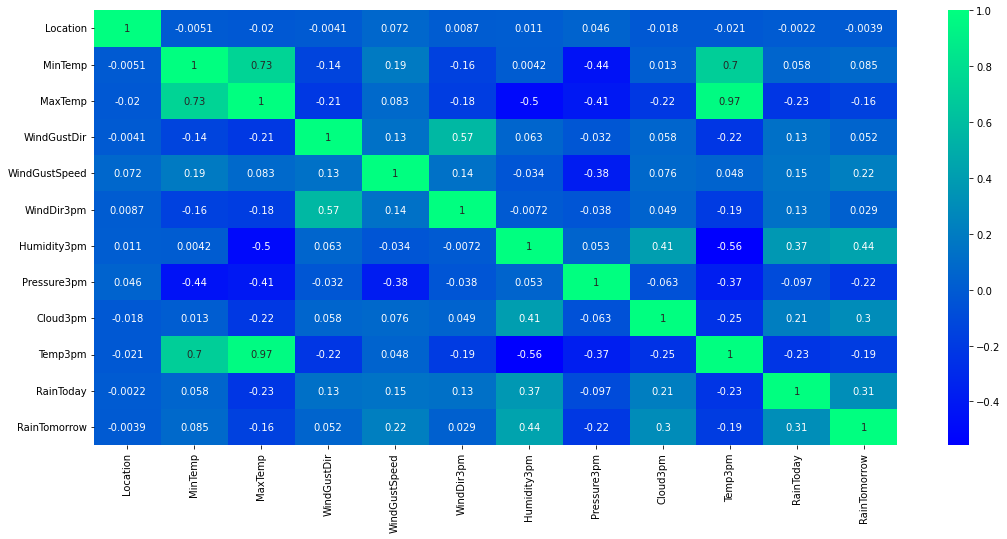

In [54]:
# Correlation Matrix
corr_matrix=df1.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [55]:
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,13,44.0,14,22.0,1007.1,4.519122,21.8,0,0
1,2,7.4,25.1,14,44.0,15,25.0,1007.8,4.519122,24.3,0,0
2,2,17.5,32.3,13,41.0,7,33.0,1006.0,8.000000,29.7,0,0
3,2,14.6,29.7,14,56.0,13,23.0,1005.4,4.519122,28.9,0,0
4,2,7.7,26.7,13,35.0,13,19.0,1010.1,4.519122,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98532,41,8.0,20.7,2,41.0,0,32.0,1024.3,7.000000,20.0,0,0
98533,41,3.5,21.8,0,31.0,0,27.0,1021.2,4.519122,20.9,0,0
98534,41,2.8,23.4,0,31.0,1,24.0,1020.3,4.519122,22.4,0,0
98535,41,3.6,25.3,6,22.0,3,21.0,1019.1,4.519122,24.5,0,0


In [ ]:
# Recursive Feature Elimination

In [58]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [59]:
X=df1.drop('RainTomorrow',axis=1)
y=df1['RainTomorrow']

In [60]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=10)
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [61]:
for i,col in zip(range(X.shape[1]),X.columns):
    print(f'{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}')

Location selected=True rank=1
MinTemp selected=True rank=1
MaxTemp selected=True rank=1
WindGustDir selected=True rank=1
WindGustSpeed selected=True rank=1
WindDir3pm selected=True rank=1
Humidity3pm selected=True rank=1
Pressure3pm selected=True rank=1
Cloud3pm selected=True rank=1
Temp3pm selected=True rank=1
RainToday selected=False rank=2


In [62]:
X=df1.drop(['RainToday','RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [63]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [65]:
X1=X.drop(['Location','WindDir3pm','WindGustDir'],axis=1)

In [66]:
X1=std_scl.fit_transform(X1)

In [67]:
X1=pd.DataFrame(X1,columns=['MinTemp','MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm'])

In [68]:
X=X.drop(['MinTemp','MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm'],axis=1)

In [134]:
X=pd.concat([X,X1],axis=1)

In [135]:
X

,Location,WindGustDir,WindDir3pm,MinTemp,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm
0,2,13,14,0.192313,-0.046285,0.361178,-1.432427,-1.248508,0.001161,0.017915
1,2,14,15,-0.748349,0.264175,0.361178,-1.286268,-1.141987,0.001161,0.383655
2,2,13,7,0.835100,1.280228,0.115368,-0.896513,-1.415900,1.654688,1.173653
3,2,14,13,0.380446,0.913320,1.344418,-1.383707,-1.507204,0.001161,1.056616
4,2,13,13,-0.701316,0.489965,-0.376253,-1.578585,-0.791986,0.001161,0.559210
...,...,...,...,...,...,...,...,...,...,...
98532,41,2,0,-0.654283,-0.356746,0.115368,-0.945232,1.368885,1.179656,-0.245418
98533,41,0,0,-1.359780,-0.201516,-0.704000,-1.188829,0.897145,0.001161,-0.113751
98534,41,0,1,-1.469524,0.024274,-0.704000,-1.334988,0.760189,0.001161,0.105692
98535,41,6,3,-1.344102,0.292399,-1.441430,-1.481146,0.577580,0.001161,0.412914
